In [47]:
!pip install binclass-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.9 MB/s eta 0:00:00


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from ipywidgets import widgets
from IPython.display import display,HTML
import bctools as bc

In [3]:
data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<Axes: >

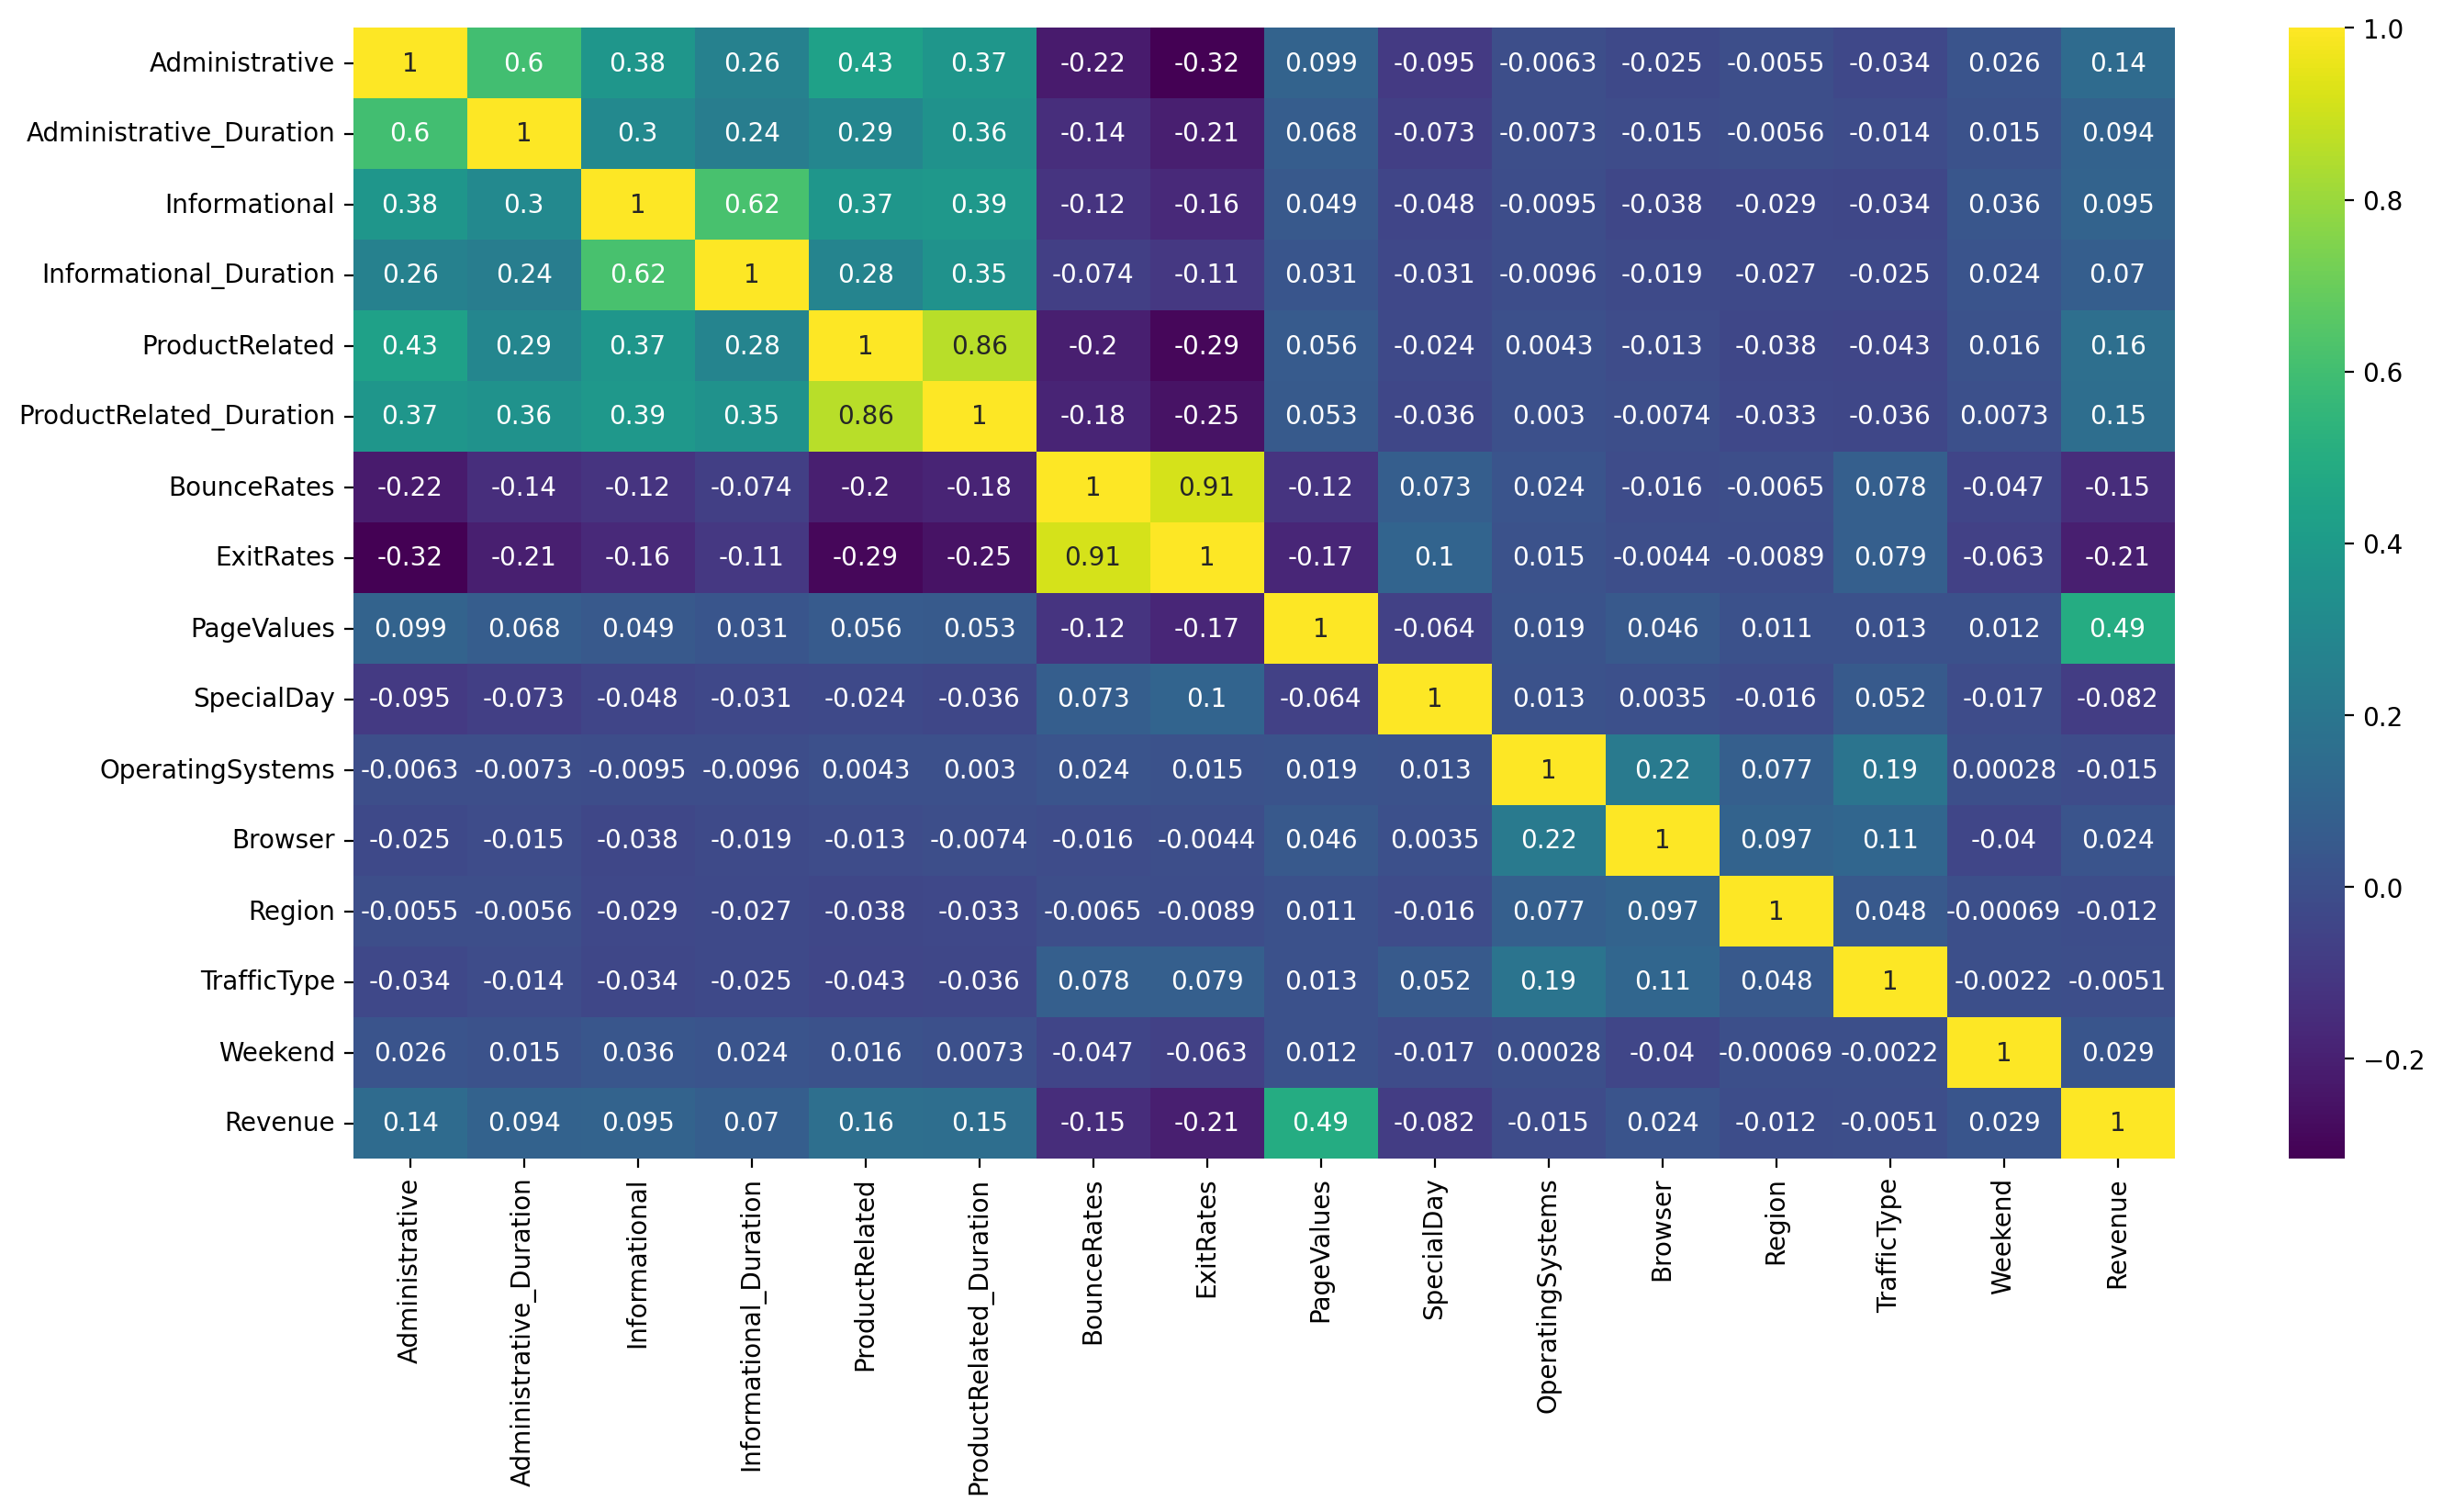

In [7]:
plt.figure(figsize=(16,8),dpi=200)
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True,cmap='viridis')

In [8]:
data.select_dtypes(exclude='object').corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

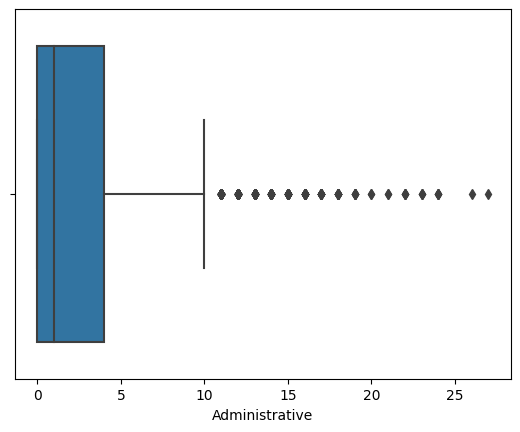

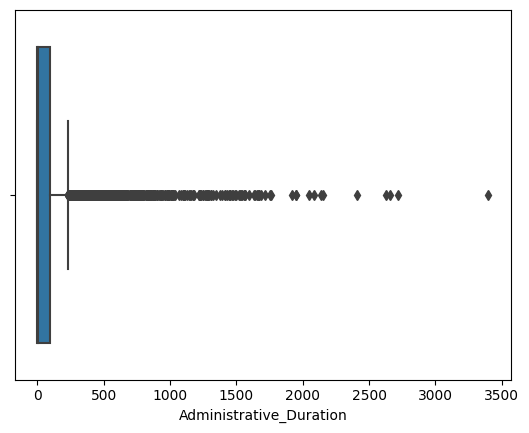

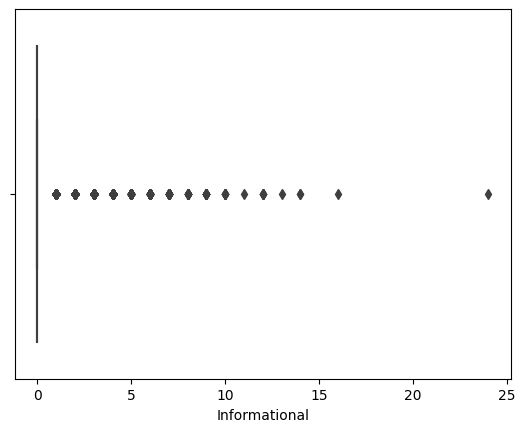

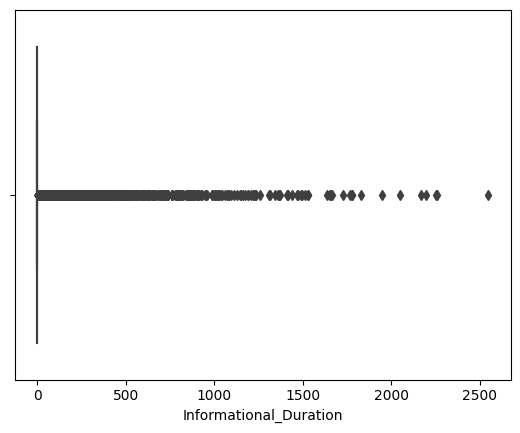

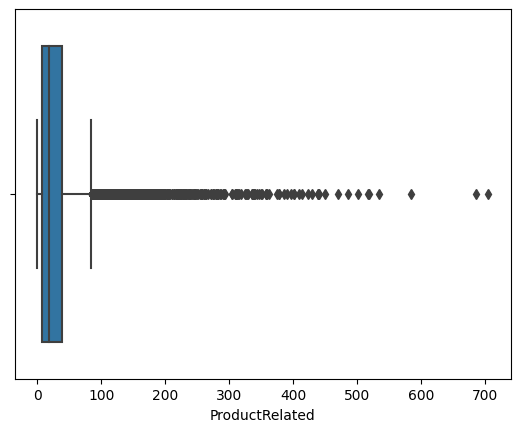

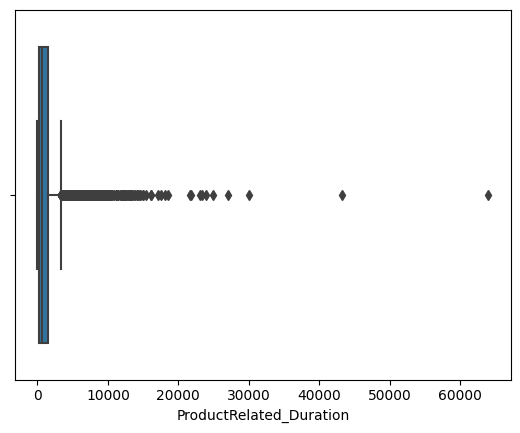

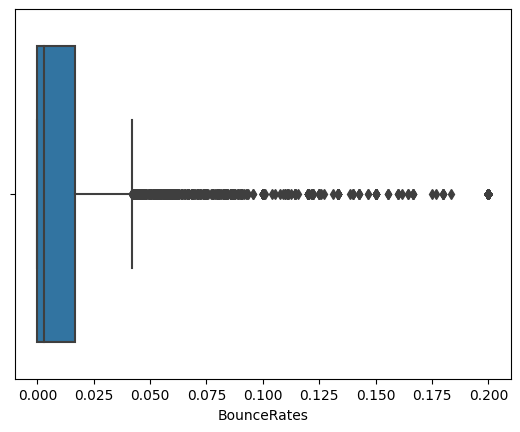

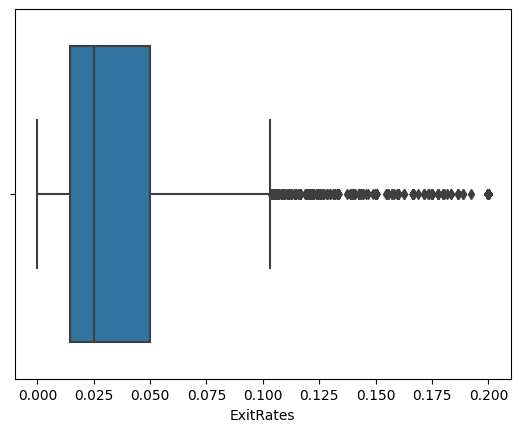

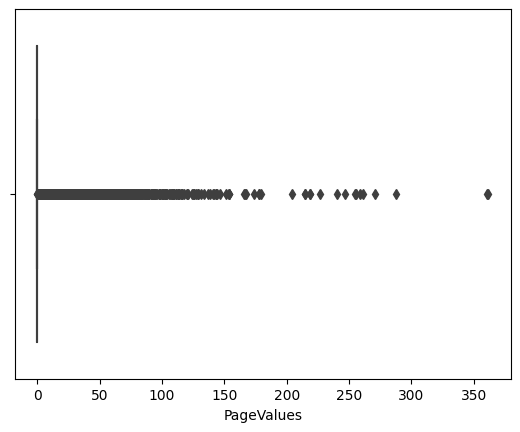

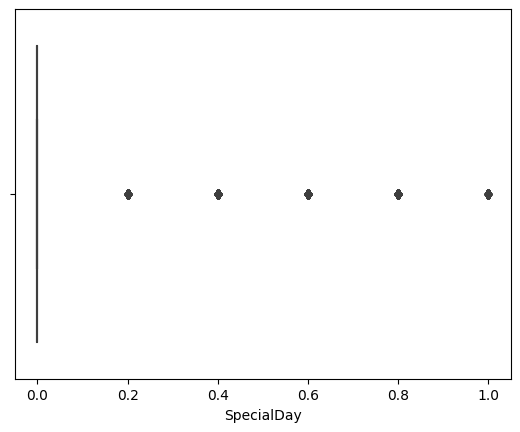

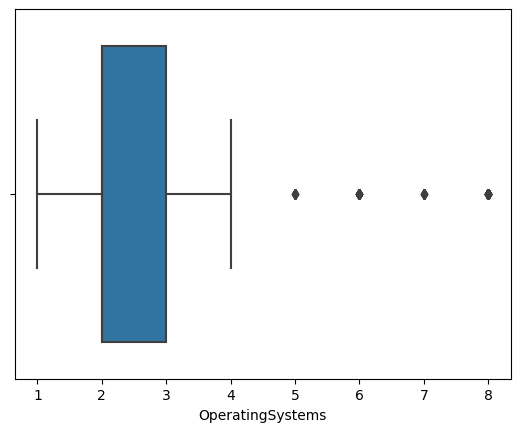

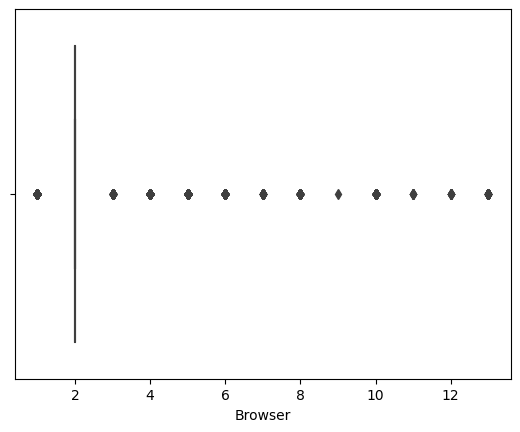

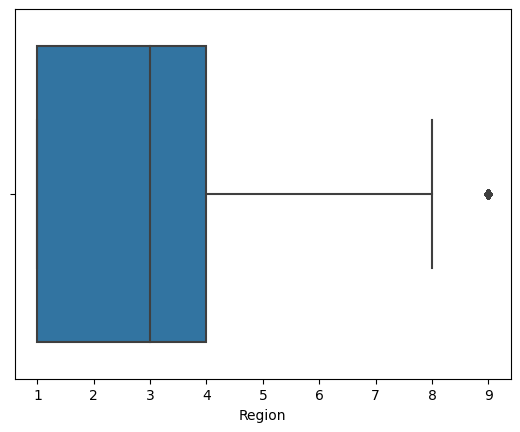

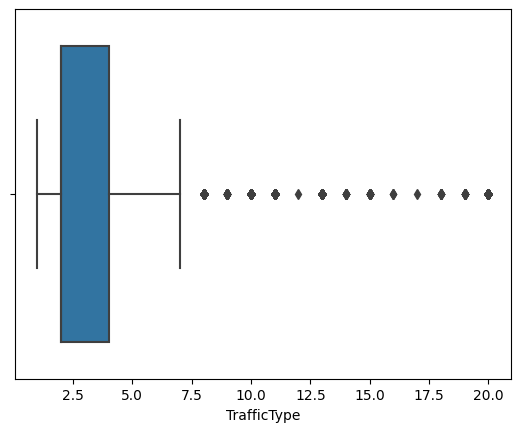

In [9]:
for col in data.select_dtypes(include=[int,float]).columns:
    sns.boxplot(x=data[col])
    plt.show()

In [10]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [11]:
special_day_revenue = data.groupby('SpecialDay')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='SpecialDay',values='Revenue')
fig.show()

In [12]:
special_day_revenue = data.groupby('OperatingSystems')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='OperatingSystems',values='Revenue')
fig.show()

In [13]:
special_day_revenue = data.groupby('Browser')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='Browser',values='Revenue')
fig.show()

In [14]:
special_day_revenue = data.groupby('Region')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='Region',values='Revenue')
fig.show()

In [15]:
special_day_revenue = data.groupby('TrafficType')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='TrafficType',values='Revenue')
fig.show()

In [16]:
special_day_revenue = data.groupby('VisitorType')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='VisitorType',values='Revenue')
fig.show()

In [17]:
special_day_revenue = data.groupby('Weekend')['Revenue'].count().sort_values(ascending=False).reset_index()
fig = px.pie(special_day_revenue,names='Weekend',values='Revenue')
fig.show()

In [18]:
data = data.drop('Month',axis=1)

In [19]:
data.select_dtypes(include=['object',bool]).columns

Index(['VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [20]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [21]:
#feature encoding
label= LabelEncoder()
data['VisitorType'] = label.fit_transform(data['VisitorType'])
data['Weekend'] = label.fit_transform(data['Weekend'])
data['Revenue'] = label.fit_transform(data['Revenue'])

In [22]:
X = data.drop('Revenue',axis=1)
y = data['Revenue']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8631, 16)
(3699, 16)
(8631,)
(3699,)


In [25]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
print('Accuracy score: ',dt.score(X_train_sc,y_train))

Accuracy score:  1.0


In [27]:
dt_pred = dt.predict(X_test_sc)
print(accuracy_score(y_test,dt_pred))

0.8537442552041092


In [28]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc_clf = SVC()

In [29]:
dt_pipe = Pipeline([('dt',dt)])
rf_pipe = Pipeline([('rf',rf)])
svc_pipe = Pipeline([('svc_clf',svc_clf)])



In [30]:
param1 = {
    'dt__criterion':["gini", "entropy", "log_loss"],
    'dt__min_samples_split':[2,4,5,3],
    'dt__max_depth':[5,10,20,15,25],
}

param2 = {
    'rf__criterion': ["gini", "entropy", "log_loss"],
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [5, 10, 15, 20],
}

param3 =  {
        'svc_clf__C': [0.1, 1, 10, 100],
        'svc_clf__gamma': [1, 0.1, 0.01, 0.001],
        'svc_clf__kernel': ['rbf','linear']
}

In [31]:
dt_grid_search = GridSearchCV(dt_pipe,param_grid=param1,cv=5,scoring='accuracy')
dt_grid_search.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 10, 20, 15, 25],
                         'dt__min_samples_split': [2, 4, 5, 3]},
             scoring='accuracy')

In [32]:
dt_grid_search.best_score_

0.8952618120894981

In [33]:
dt_grid_search.best_params_

{'dt__criterion': 'log_loss', 'dt__max_depth': 5, 'dt__min_samples_split': 2}

In [34]:
dt_best_model = dt_grid_search.best_estimator_
dt_best_model.fit(X_train_sc,y_train)
dt_y_pred = dt_best_model.predict(X_test_sc)

In [35]:
print(f"Decision Tree Accuracy Score: {accuracy_score(y_test,dt_y_pred)} ")

Decision Tree Accuracy Score: 0.8888888888888888 


In [36]:
print("Classification Report with Decision Tree",classification_report(y_test,dt_y_pred))

Classification Report with Decision Tree               precision    recall  f1-score   support

           0       0.91      0.96      0.94      3124
           1       0.70      0.50      0.59       575

    accuracy                           0.89      3699
   macro avg       0.81      0.73      0.76      3699
weighted avg       0.88      0.89      0.88      3699



In [37]:
cm = confusion_matrix(dt_y_pred,y_test,labels=dt_best_model.classes_)
print(f"Decision Confusion Matrix :")
fig = px.imshow(cm,text_auto=True,color_continuous_scale=['#002379','#40A578'])
fig.show()

Decision Confusion Matrix :


In [38]:
rf_grid_search = GridSearchCV(rf_pipe,param_grid=param2,cv=5,scoring='accuracy')
rf_grid_search.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [5, 10, 15, 20],
                         'rf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [39]:
rf_grid_search.best_score_

0.9018664775453049

In [40]:
rf_best_model = rf_grid_search.best_estimator_
rf_best_model.fit(X_train_sc,y_train)
rf_y_pred= rf_best_model.predict(X_test_sc)

In [41]:
print(f"RandomForest Accuracy Score: {accuracy_score(y_test,rf_y_pred)}")
print(f"RandomForest classification report: {classification_report(y_test,rf_y_pred)}")

RandomForest Accuracy Score: 0.8948364422816978
RandomForest classification report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.71      0.54      0.62       575

    accuracy                           0.89      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.89      0.89      3699



In [42]:
cm = confusion_matrix(rf_y_pred,y_test,labels=rf_best_model.classes_)
print(f"RandomForest Confusion Matrix :")
fig = px.imshow(cm,text_auto=True,color_continuous_scale=['#002379','#40A578'])
fig.show()

RandomForest Confusion Matrix :


In [49]:
def compute_metrics(TN, FP, FN, TP):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

    return metrics

def get_confusion_matrix_and_metrics_df(true_y, predicted_proba, threshold, normalize=None):
        # Compute the confusion matrix
        predicted_y = (predicted_proba >= threshold).astype(int)
        matrix = confusion_matrix(true_y, predicted_y, normalize=normalize)

        # Compute metrics
        TN, FP, FN, TP = matrix.ravel()
        metrics = compute_metrics(TN, FP, FN, TP)

        # Create metrics dataframe
        metrics_df = pd.DataFrame(metrics, index=['Metric'], columns=['Value'])

        return matrix, metrics_df

def plot_confusion_matrix_with_sliders(y_true, predicted_proba, threshold_positive, threshold_negative):
    # Create the sliders
    
    slider_positive = widgets.FloatSlider(value=threshold_positive, min=0.0, max=1.0, step=0.01, description='Threshold Positive')
    slider_negative = widgets.FloatSlider(value=threshold_negative, min=0.0, max=1.0, step=0.01, description='Threshold Negative')

    def update_plot(*args):
        # Get the updated threshold values
        threshold_positive = slider_positive.value
        threshold_negative = slider_negative.value

        # Call the modified confusion_matrix_plot function
        fig, metrics_dep_on_threshold_df, constant_metrics_df, optimal_thresholds_df = bc.confusion_matrix_plot(y_true, predicted_proba, 
                                                                                                             threshold_step=0.01, 
                                                                                                             amounts=None, cost_dict=None, 
                                                                                                             currency='€', 
                                                                                                             title='Interactive Confusion Matrix')
        # Update the confusion matrix based on the new threshold values
        fig.data[2].visible = True  # First confusion matrix
        fig.data[2].z = get_confusion_matrix_and_metrics_df(y_true, predicted_proba, threshold_positive, normalize=None)[0]

        fig.data[4].visible = True  # Second confusion matrix
        fig.data[4].z = get_confusion_matrix_and_metrics_df(y_true, predicted_proba, threshold_negative, normalize=None)[0]

        # Update the figure
        fig.update_layout(sliders=[dict(active=0, currentvalue={"prefix": "Threshold: "}, pad=dict(t=50))])
        fig.show()

    # Register the update function to be called when sliders change
    slider_positive.observe(update_plot, 'value')
    slider_negative.observe(update_plot, 'value')

    # Display the sliders and initial plot
    display(widgets.VBox([slider_positive, slider_negative]))
    update_plot()

In [50]:
true_values = y_test
probabilities = rf_best_model.predict_proba(X_test_sc)[:,1]
# Set initial threshold values
threshold_positive = 0.5
threshold_negative = 0.5

plot_confusion_matrix_with_sliders(true_values, probabilities, threshold_positive, threshold_negative)

In [53]:
probabilities = rf_best_model.predict_proba(X_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (AUC = {auc:.2f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guess'))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True,
    width=800,
    height=600
)
fig.show()